# Importações

In [15]:
import pandas as pd
import numpy as np

In [16]:
# Database
perguntas = pd.read_csv("stackoverflow_perguntas.csv")

# Mostra as primeiras linhas
perguntas.head()

,Perguntas,Tags
0,Possuo um projeto Node.js porém preciso criar ...,node.js
1,"Gostaria de fazer testes unitários no Node.js,...",node.js
2,Como inverter a ordem com que o jQuery itera u...,jquery
3,Eu tenho uma página onde pretendo utilizar um ...,html
4,Como exibir os dados retornados do FireStore e...,html angular


In [17]:
# Tamanho do database
perguntas.shape

(5408, 2)

In [18]:
# Todas as tags presentes no database
perguntas["Tags"].unique()

array(['node.js', 'jquery', 'html', 'html angular ', 'html ', 'angular',
       'angular ', 'jquery html  ', 'jquery ', 'jquery html',
       'jquery html ', 'html angular', 'angular node.js ', 'html  ',
       'jquery html angular', 'node.js ', 'html jquery', 'html jquery ',
       'jquery angular  ', 'html node.js', 'jquery  ', 'angular node.js',
       'jquery angular', 'html node.js ', 'jquery node.js ', 'angular  ',
       'jquery angular ', 'jquery html angular ', 'node.js html ',
       ' node.js', 'node.js html', 'html angular  ', 'jquery node.js',
       'angular html', 'html angular  node.js', 'jquery html node.js',
       'html angular node.js'], dtype=object)

In [19]:
len(perguntas["Tags"].unique())

37

In [20]:
# Criar conjunto de palavras-chave únicas sem repetição
label = set(tag for tags in perguntas["Tags"].unique() for tag in tags.split())

# Criar colunas binárias de forma eficiente
for tag in label:
    perguntas[tag] = perguntas["Tags"].str.contains(tag).astype(int)

perguntas

,Perguntas,Tags,html,node.js,jquery,angular
0,Possuo um projeto Node.js porém preciso criar ...,node.js,0,1,0,0
1,"Gostaria de fazer testes unitários no Node.js,...",node.js,0,1,0,0
2,Como inverter a ordem com que o jQuery itera u...,jquery,0,0,1,0
3,Eu tenho uma página onde pretendo utilizar um ...,html,1,0,0,0
4,Como exibir os dados retornados do FireStore e...,html angular,1,0,0,1
...,...,...,...,...,...,...
5403,Queria saber como pegar o total de cores de um...,jquery html,1,0,1,0
5404,"Boa noite, estou usando phonegap para fazer um...",html,1,0,0,0
5405,"Estou construindo um mini fórum, e nele, os us...",jquery html,1,0,1,0
5406,"Boa tarde, Estou para desenvolver um site na ...",html,1,0,0,0


# Variáveis

In [21]:
# Explicativas
x = perguntas["Perguntas"]

# Alvo
y = perguntas[["html", "angular", "node.js", "jquery"]]

# TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Transformando texto para linguagem de máquina com TF-IDF
vetorizar = TfidfVectorizer(max_features=5000, max_df=0.85)

# Transformação
x = vetorizar.fit_transform(x)

# Agrmax

In [24]:
# Transformando a variavel y para um array 1D
y = np.argmax(y.values, axis=1)

y

array([2, 2, 3, ..., 0, 0, 0], dtype=int64)

# Teste e treino

In [25]:
from sklearn.model_selection import train_test_split

# treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=0)

# Modelo

In [26]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

regressao = LogisticRegression()

classificador_onevs = OneVsOneClassifier(regressao).fit(X_treino, y_treino)

# Score

Considera um erro quando uma linha tem apenas um erro. Não avalia os blocos binários individualmente

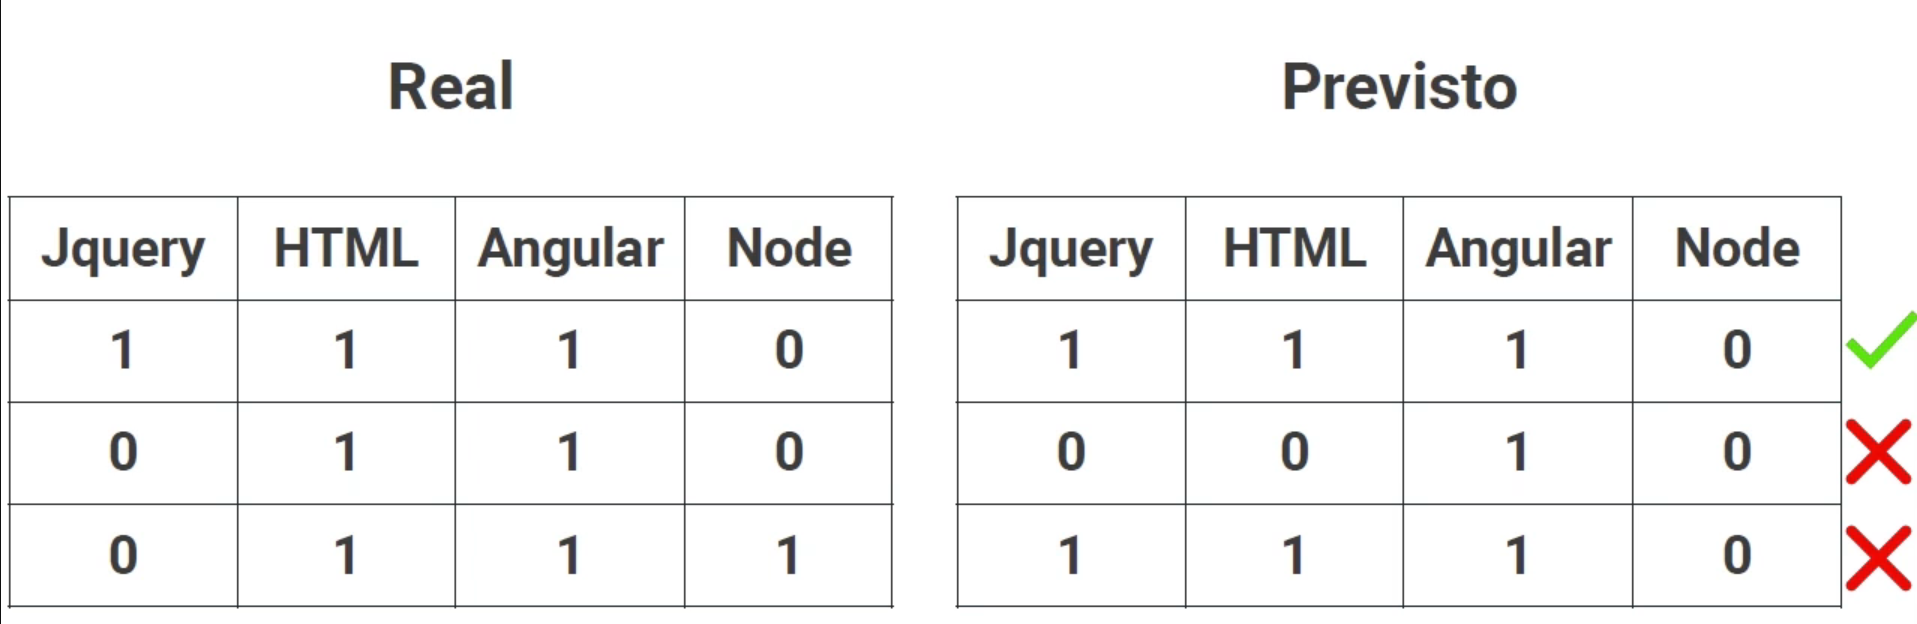

In [28]:
resultado = classificador_onevs.score(X_teste, y_teste)

# Acurácia considera errado uma linh
print(f"O score do modelo OneVsOneClassifier foi de {resultado:.2f}")

O score do modelo OneVsOneClassifier foi de 0.61
